In [1]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# create a set of random lat and long combinations
lats= np.random.uniform(low=-90, high=90, size=1500)
lngs=np.random.uniform(low=-90, high=90, size=1500)
lat_lngs =zip(lats, lngs)
lat_lngs

In [3]:
# add the lats and lngs to a list
coordinates =list(lat_lngs)

In [4]:
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

86.68416864681961 -51.90341037933669
26.712716311658028 -62.81730200358815
-16.625848263423322 20.394660718553098
-1.9742903126627311 -19.64377460032523
-49.657795405901815 29.513851891214784
13.045484645711412 -39.90574435816624
54.28039736622341 50.06765858686424
-5.142795125191796 -15.723379565746626
80.36412503324536 -43.63419915622879
-71.47589457819299 59.2589678318179
-87.91133917634826 -81.47028636987868
34.58495737411894 20.431041703502544
31.800732629234886 -89.60121041539037
72.07526818473434 -71.83518785233939
-13.615619231167841 -67.14025094531709
-55.54409335631983 -49.06594413059511
16.756546268187222 -76.85010326018586
-2.855110247278006 -76.83225017669834
-24.266601583641318 78.04876870037617
34.408326751211746 -58.18871236901918
-9.138600878971587 -26.628522749176533
43.187533134200464 -15.373868779768003
-50.26556338823381 -33.55697189612015
-25.68271224244421 71.33325244974631
74.43837600683295 72.23572136151276
-49.2361532433299 -8.187414752137173
-44.0565276477866

75.72648928366888 11.831893976061252
-88.86460570906921 -83.73350490677149
21.517062770209264 -38.6686371295041
72.32535003912886 -86.7262828711812
-68.07957269662734 15.597850628172978
33.9721332162906 -67.78339365751148
66.48542602240875 39.305511650949285
38.71858962364283 -85.96736450130516
-10.511097714863382 68.10867234140207
-36.38327044387154 -9.78770878335925
21.79274122132564 -15.123925167267913
43.841149887340464 -54.48023280546712
2.297162570520271 -46.21247810562933
-84.1409987164108 -40.490637214862005
31.210285946426865 -52.34125151913551
88.34778220498731 -8.992050422990161
-16.5254438481534 38.36178478941392
34.72262436997637 81.2553488435342
60.32386906206739 -29.021091791858048
5.141099918963533 -83.03658330286498
33.27897977768805 -78.002104510302
-50.42415466368728 -62.64860691677157
73.04797094445394 57.93561938797279
15.967023939556285 70.30784966824933
-85.44197262939709 20.026981107059868
-69.68868579663146 45.63914684916685
8.567334400814204 -39.55065990809306

-45.798657073532276 -0.8290453667819264
73.12108964521511 -60.84718816242062
23.425533096965452 -10.403449690394723
52.6607503401288 2.2556107620178665
3.5595055231710404 -37.36467555785899
-37.63372178277113 -42.87611962658439
-16.825699488442524 57.259448660548685
31.40906184330845 -4.717278199918184
-85.19309084879443 84.60938381929464
6.7523896515030515 45.969388944852966
75.64508547586479 14.368966536646724
-37.12772011108728 8.458208950370363
74.91901955980222 55.55297659243382
28.98138422180618 -77.03417985414221
-27.01184606778653 -60.43284402471431
71.5426412204408 79.05689792338683


In [5]:
from citipy import citipy

In [6]:
# create a list for holding the cities
cities =[]
# identify the nearest city for each lat n lng combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if the city is unique then add it to the cities list
    if city not in cities:
        cities.append(city)
        
# print the city count to confirm the sufficient count
len(cities)

636

In [7]:
import requests
from config import weather_api_key
from datetime import datetime

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14fd419c1ad697fae6098b0625f08e7c


In [9]:
# create an empty list to hold weather data
city_data = []
# print the beginning of the logging
print("Beginning Data Retrieval")
print("-------------------------")
# create counters
record_count = 1
set_count = 1

# loop through all the cities in our list
for i, city in enumerate(cities):
    
    # group the cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count += 1
    # create endpoint url with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # log the url, record and set numbers and the city.
    print(f"Processing Record {record_count} of set {set_count} | {city}")
    # add 1 to the record count
    record_count += 1
    
# run an api request for each of the cities
    try:
        # parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # convert the date to iso standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # append the city info into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date,
                         "Max Temp": city_max_temp})
# if an error is experienced, skip the city
    except:
        print("City not found. Skipping ...")
        pass
    # indicate that Data loading is complete
print("----------------------")
print("Data Retrieval Complete")
print("----------------------")

Beginning Data Retrieval
-------------------------
Processing Record 1 of set 1 | upernavik
Processing Record 2 of set 1 | hamilton
Processing Record 3 of set 1 | rundu
Processing Record 4 of set 1 | georgetown
Processing Record 5 of set 1 | port elizabeth
Processing Record 6 of set 1 | cayenne
Processing Record 7 of set 1 | novocheremshansk
Processing Record 8 of set 1 | ilulissat
Processing Record 9 of set 1 | taolanaro
City not found. Skipping ...
Processing Record 10 of set 1 | ushuaia
Processing Record 11 of set 1 | tukrah
Processing Record 12 of set 1 | laurel
Processing Record 13 of set 1 | clyde river
Processing Record 14 of set 1 | santa rosa
Processing Record 15 of set 1 | morant bay
Processing Record 16 of set 1 | sucua
Processing Record 17 of set 1 | grand river south east
City not found. Skipping ...
Processing Record 18 of set 1 | saint george
Processing Record 19 of set 1 | olinda
Processing Record 20 of set 1 | muros
Processing Record 21 of set 1 | chuy
Processing Recor

Processing Record 189 of set 4 | zhob
Processing Record 190 of set 4 | verkhniy ufaley
Processing Record 191 of set 4 | castro
Processing Record 192 of set 4 | telimele
Processing Record 193 of set 4 | kluczbork
Processing Record 194 of set 4 | meulaboh
Processing Record 195 of set 4 | kribi
Processing Record 196 of set 4 | bayir
Processing Record 197 of set 4 | mondlo
Processing Record 198 of set 4 | brae
Processing Record 199 of set 4 | shetpe
Processing Record 200 of set 4 | verkhnetulomskiy
Processing Record 201 of set 4 | apomu
Processing Record 202 of set 4 | skjervoy
Processing Record 203 of set 4 | buta
Processing Record 205 of set 5 | tubruq
City not found. Skipping ...
Processing Record 206 of set 5 | dudinka
Processing Record 207 of set 5 | shar
Processing Record 208 of set 5 | kautokeino
Processing Record 209 of set 5 | dwarka
Processing Record 210 of set 5 | longyearbyen
Processing Record 211 of set 5 | harindanga
Processing Record 212 of set 5 | odweyne
Processing Record 

Processing Record 377 of set 8 | lere
Processing Record 378 of set 8 | campoverde
Processing Record 379 of set 8 | magole
Processing Record 380 of set 8 | acarau
Processing Record 381 of set 8 | brahmapuri
City not found. Skipping ...
Processing Record 382 of set 8 | saint marys
Processing Record 383 of set 8 | opuwo
Processing Record 384 of set 8 | ratnagiri
Processing Record 385 of set 8 | sambava
Processing Record 386 of set 8 | polaniec
Processing Record 387 of set 8 | seymour
Processing Record 388 of set 8 | nouadhibou
Processing Record 389 of set 8 | salinopolis
Processing Record 390 of set 8 | mocuba
Processing Record 391 of set 8 | olafsvik
Processing Record 392 of set 8 | burica
City not found. Skipping ...
Processing Record 393 of set 8 | north myrtle beach
Processing Record 394 of set 8 | comodoro rivadavia
Processing Record 395 of set 8 | soanierana ivongo
Processing Record 396 of set 8 | pec
Processing Record 397 of set 8 | san andres
Processing Record 398 of set 8 | tucup

Processing Record 557 of set 11 | itacare
Processing Record 558 of set 11 | porto novo
Processing Record 559 of set 11 | kannangad
Processing Record 560 of set 11 | vicuna
Processing Record 562 of set 12 | krasnoselkup
Processing Record 563 of set 12 | san martin
Processing Record 564 of set 12 | crossville
Processing Record 565 of set 12 | farah
Processing Record 566 of set 12 | spas-demensk
Processing Record 567 of set 12 | polunochnoye
Processing Record 568 of set 12 | itatinga
Processing Record 569 of set 12 | okahandja
Processing Record 570 of set 12 | ileza
Processing Record 571 of set 12 | gopamau
Processing Record 572 of set 12 | puerto el triunfo
Processing Record 573 of set 12 | crixas
Processing Record 574 of set 12 | calbuco
Processing Record 575 of set 12 | nagapattinam
Processing Record 576 of set 12 | zelenoborskiy
Processing Record 577 of set 12 | sainte-maxime
Processing Record 578 of set 12 | winsum
Processing Record 579 of set 12 | coruripe
Processing Record 580 of s

In [10]:
len(city_data)

580

In [11]:
# convert the array of dictionaries to a pandas dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp
0,Upernavik,72.7868,-56.1549,86,100,3.83,GL,2021-03-24 18:24:34,-13.34
1,Hamilton,39.1834,-84.5333,49,75,14.97,US,2021-03-24 18:22:36,72.00
2,Rundu,-17.9333,19.7667,67,99,4.45,NA,2021-03-24 18:24:34,74.25
3,Georgetown,5.4112,100.3354,94,20,1.14,MY,2021-03-24 18:24:35,80.01
4,Port Elizabeth,-33.9180,25.5701,83,20,11.50,ZA,2021-03-24 18:24:35,69.80
5,Cayenne,4.9333,-52.3333,55,20,16.11,GF,2021-03-24 18:24:36,87.80
6,Novocheremshansk,54.3571,50.1666,91,93,4.07,RU,2021-03-24 18:20:14,27.27
7,Ilulissat,69.2167,-51.1000,71,75,12.66,GL,2021-03-24 18:24:36,-4.00
8,Ushuaia,-54.8000,-68.3000,81,75,36.82,AR,2021-03-24 18:24:37,42.80
9,Tukrah,32.5341,20.5791,60,100,21.36,LY,2021-03-24 18:24:37,55.47


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,2021-03-24 18:24:34,72.7868,-56.1549,-13.34,86,100,3.83
1,Hamilton,US,2021-03-24 18:22:36,39.1834,-84.5333,72.00,49,75,14.97
2,Rundu,NA,2021-03-24 18:24:34,-17.9333,19.7667,74.25,67,99,4.45
3,Georgetown,MY,2021-03-24 18:24:35,5.4112,100.3354,80.01,94,20,1.14
4,Port Elizabeth,ZA,2021-03-24 18:24:35,-33.9180,25.5701,69.80,83,20,11.50
...,...,...,...,...,...,...,...,...,...
575,Lahij,YE,2021-03-24 18:28:02,13.1667,44.5833,76.66,28,8,4.99
576,Portobelo,PA,2021-03-24 18:28:03,9.5500,-79.6500,84.00,99,58,4.00
577,Great Yarmouth,GB,2021-03-24 18:28:03,52.6083,1.7305,51.80,71,0,8.05
578,Marsh Harbour,BS,2021-03-24 18:28:03,26.5412,-77.0636,77.76,64,55,6.51


In [13]:
# create an output file (CSV)
output_data_file = "weather_data/cities.csv"
#export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [14]:
# extract relevant fields from the dataframe for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

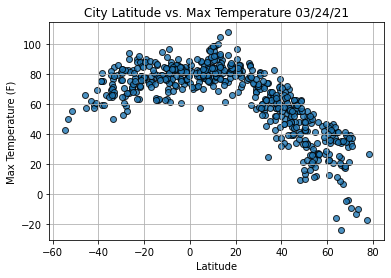

In [15]:
# import the time module
import time

# build the scatter plot for lat versus max temp
plt.scatter(lats,
           max_temps,
           edgecolor ='black', linewidths=1, marker='o',
           alpha=0.8, label="Cities")
# incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig1.png")

# show plot
plt.show()

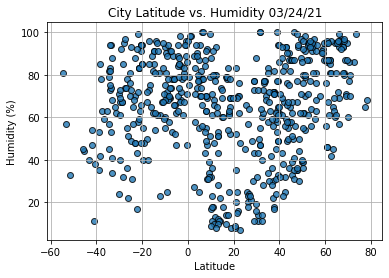

In [16]:
# build the scatter plot for lat versus max temp
plt.scatter(lats,
           humidity,
           edgecolor ='black', linewidths=1, marker='o',
           alpha=0.8, label="Cities")
# incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig2.png")

# show plot
plt.show()

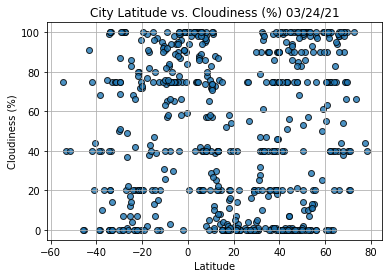

In [17]:
# build the scatter plots for latitude vs cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label="Cities")

# incorporate other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) " +time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save the fig
plt.savefig("weather_data/Fig3.png")
plt.show()

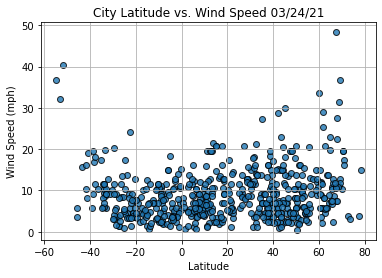

In [18]:
# build the scatter plots for latitude vs cloudiness
plt.scatter(lats,
           wind_speed,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label="Cities")

# incorporate other graph properties
plt.title(f"City Latitude vs. Wind Speed " +time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# save the fig
plt.savefig("weather_data/Fig4.png")
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                   Morant Bay
Country                        JM
Date          2021-03-24 18:24:39
Lat                       17.8815
Lng                      -76.4093
Max Temp                       86
Humidity                       62
Cloudiness                     20
Wind Speed                  20.71
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4      False
       ...  
575     True
576     True
577     True
578     True
579    False
Name: Lat, Length: 580, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"]>=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Upernavik,GL,2021-03-24 18:24:34,72.7868,-56.1549,-13.34,86,100,3.83
1,Hamilton,US,2021-03-24 18:22:36,39.1834,-84.5333,72.00,49,75,14.97
3,Georgetown,MY,2021-03-24 18:24:35,5.4112,100.3354,80.01,94,20,1.14
5,Cayenne,GF,2021-03-24 18:24:36,4.9333,-52.3333,87.80,55,20,16.11
6,Novocheremshansk,RU,2021-03-24 18:20:14,54.3571,50.1666,27.27,91,93,4.07


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

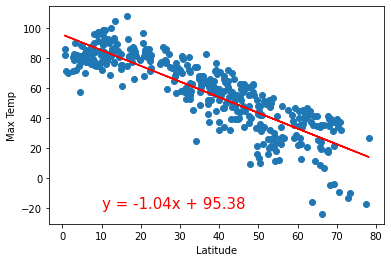

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,-20))

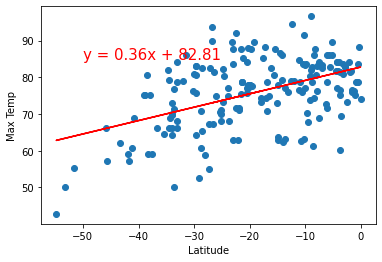

In [25]:
# linear regression on the southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemipsphere \
                      for Maximum Temperature', 'Max Temp',(-50,85))

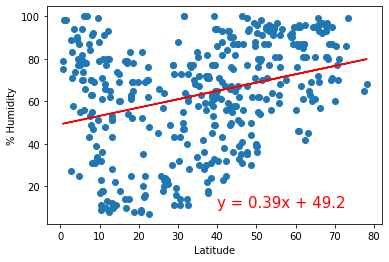

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

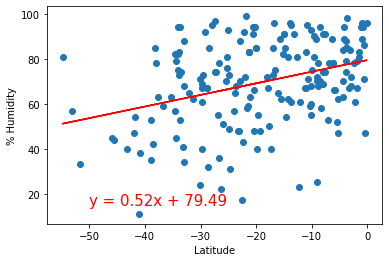

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

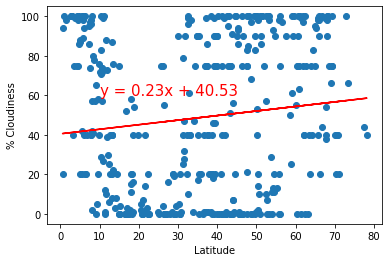

In [28]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere / for % Cloudiness', '% Cloudiness', (10,60))


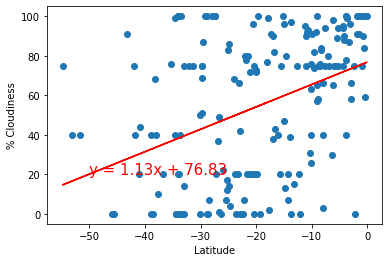

In [29]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \ for % Cloudiness', '% Cloudiness', (-50,20))


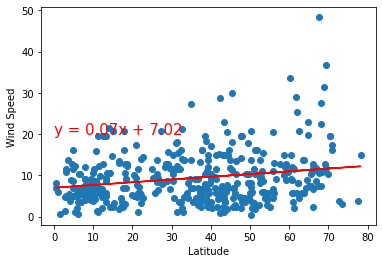

In [30]:
# plot linear regression for wind speed northern and southern hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Linear regression on the Northern Hemisphere \ for wind speed', 'Wind Speed', (0,20))

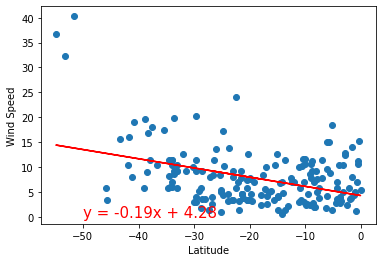

In [31]:
# plot linear regression for wind speed northern and southern hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Linear regression on the Southern Hemisphere \ for wind speed', 'Wind Speed', (-50,0))